Task 2
Project - Credit Card Fraud Detection

The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

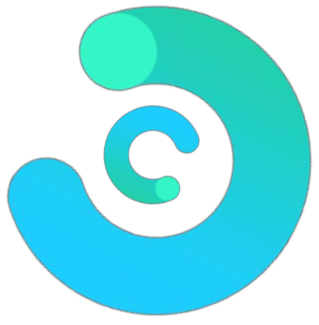

CodeClause May

By Sri Ramya K

* Importing the required libraries - 

In [42]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Loading Dataset -

In [43]:
data=pd.read_csv('credit card.csv/creditcard_2023.csv.zip')


In [44]:
data.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


* Data Descriptive Statistics -



In [45]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


* Data Information -

In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [47]:
data.shape


(568630, 31)

568630 rows and 31 columns of data set 

In [48]:
data.columns


Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

* Checking Null Values -

In [49]:
data.isnull().sum()


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are NO Null Values in dataset

* Checking the cases whether they are fraud cases or Normal cases -

In [50]:
fraud_cases = len(data[data['Class'] == 1])

In [51]:
print(' Number of Fraud Cases:',fraud_cases)


 Number of Fraud Cases: 284315


In [52]:
non_fraud_cases=len(data[data['Class']==0])


In [53]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [54]:
fraud=data[data['Class']==1]


In [55]:
normal=data[data['Class']==0]


In [56]:
fraud.Amount.describe()


count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [57]:
normal.Amount.describe()


count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

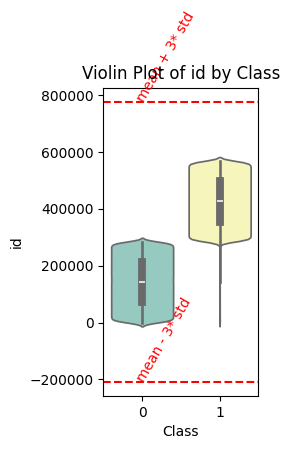

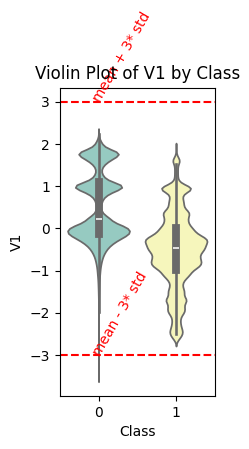

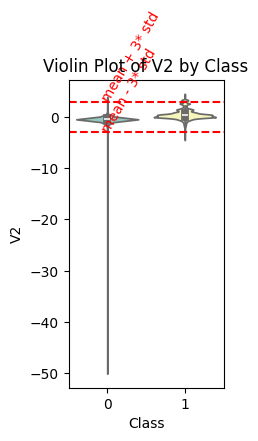

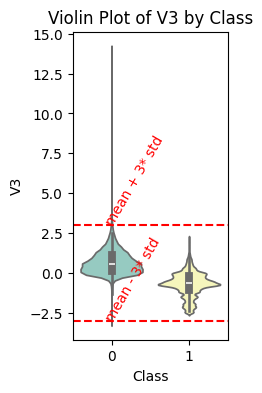

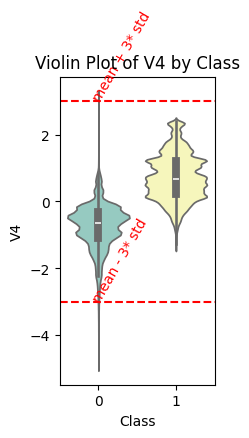

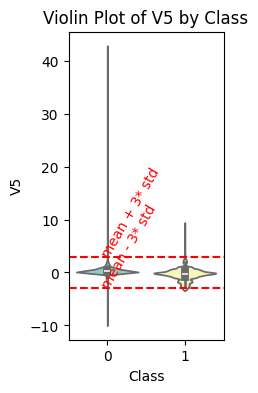

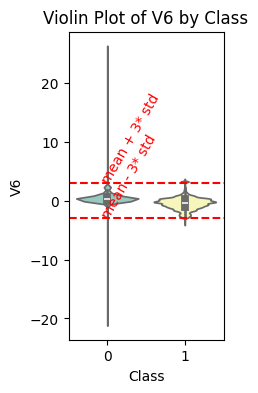

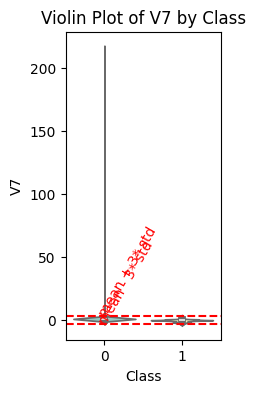

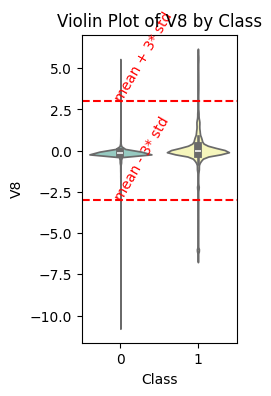

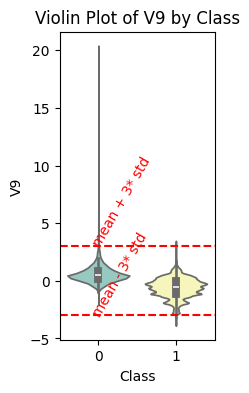

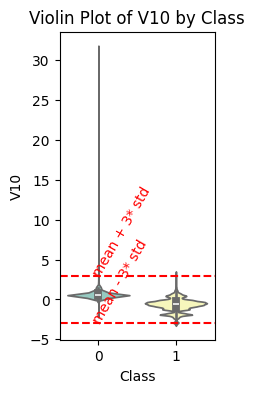

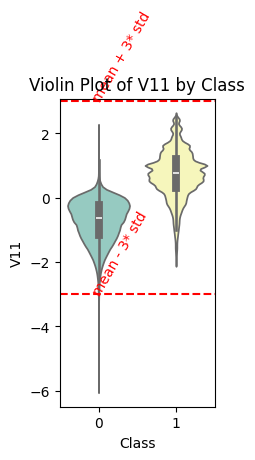

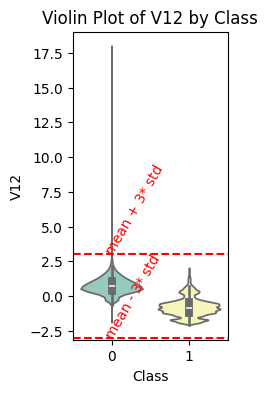

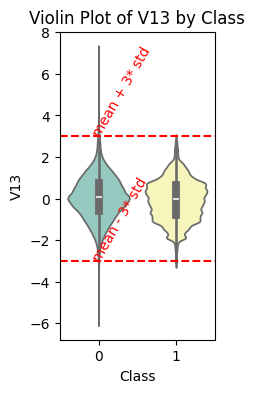

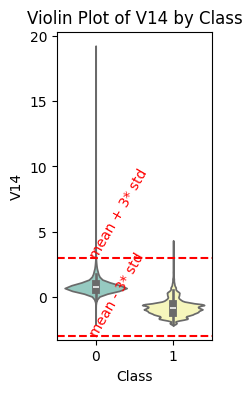

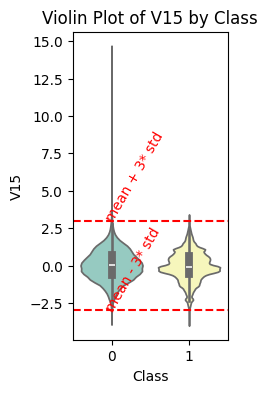

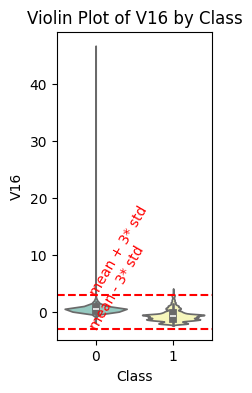

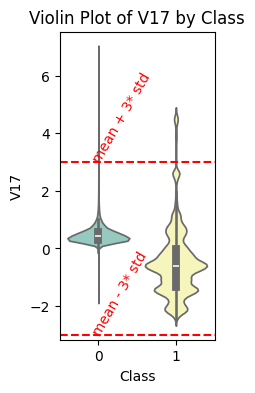

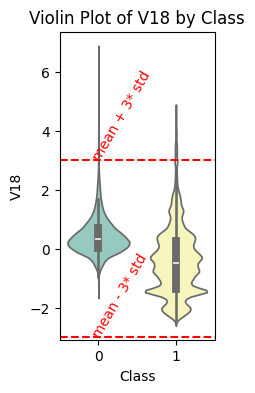

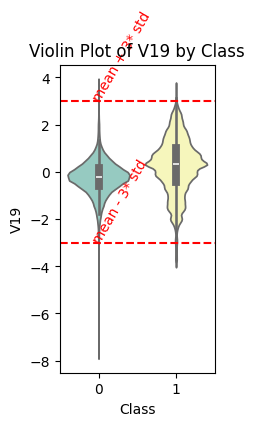

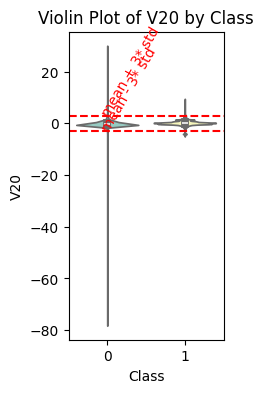

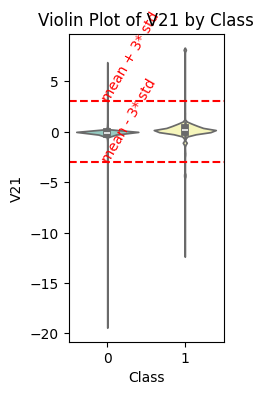

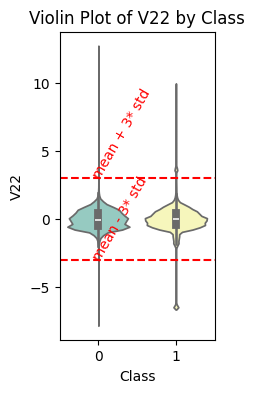

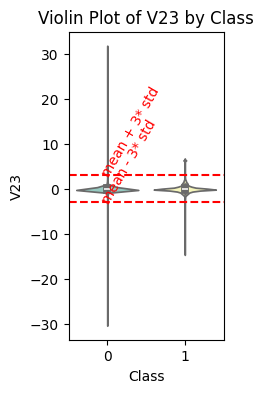

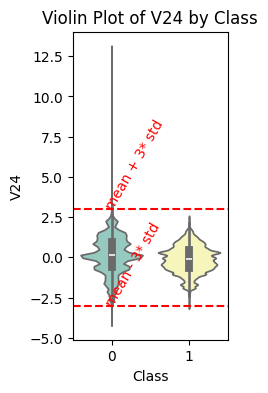

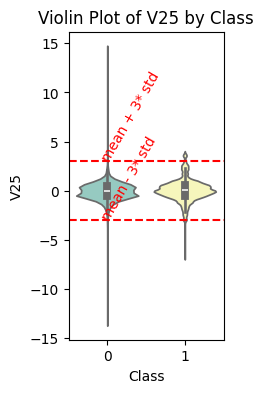

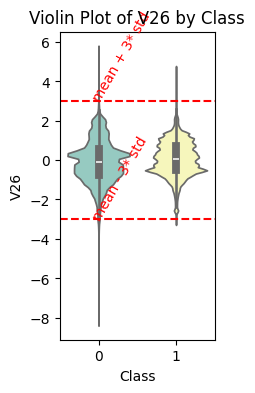

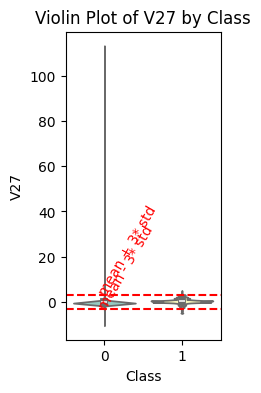

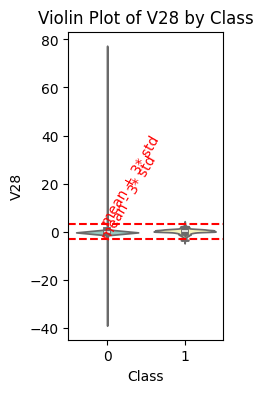

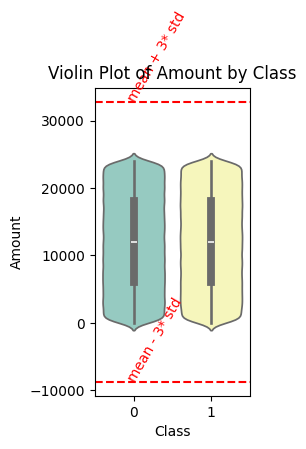

In [58]:


for var in data.columns[:-1]:
    plt.figure(figsize=(2, 4))
    sns.violinplot(x=data['Class'], y=data[var], palette='Set3')
    
    mean = data[var].mean()
    std = data[var].std()
    
    plt.axhline(mean - 3 * std, color='r', linestyle='--')
    plt.text(-0.1, mean - 3 * std, 'mean - 3* std', color='r', rotation=60)
    
    plt.axhline(mean + 3 * std, color='r', linestyle='--')
    plt.text(-0.1, mean + 3 * std, 'mean + 3* std', color='r', rotation=60)
    
    plt.title(f'Violin Plot of {var} by Class')
    plt.show()


<Axes: >

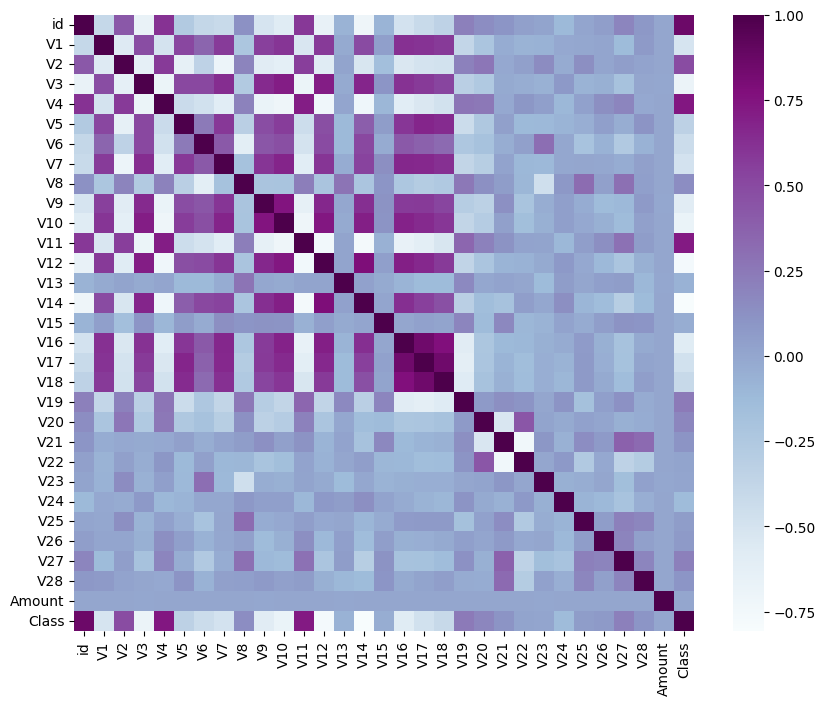

In [62]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparing the data
X = data.drop(['Class'], axis=1)
y = data['Class']

# Initializing the model
dt = DecisionTreeRegressor()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Training the model
model = dt.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Binarizing predictions: assume a threshold of 0.5 for classification
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# Calculating accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9995603467984454


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Don't forget this import

# Assuming 'data' is your DataFrame and 'Class' is the target column
X1 = data.drop(['Class'], axis=1)
y1 = data['Class']

# Splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)

# Initializing Logistic Regression model
lr = LogisticRegression()

# Training the model
model2 = lr.fit(X1_train, y1_train)

# Making predictions
prediction2 = model2.predict(X1_test)

# Calculating accuracy
accuracy = accuracy_score(y1_test, prediction2)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7920498977073551


All model perform perfect accuracy.